##Analysis of ASEAN-6 Borrowing Behavior

This section examines how borrowing behaviors in ASEAN-6 evolved between 2014 and 2024, focusing on formal, mobile, and informal borrowing patterns.

The following questions were pre-selected to examine and compare borrowing behavior across ASEAN 6:

**fin22a**: Borrowed from a formal bank or similar financial institution (%, age 15+).

**fin22a_1**: Borrowed from a mobile money provider (%, age 15+).

**fin22b**: Borrowed from family or friends (%, age 15+).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load dataset
df = pd.read_csv('global_findex_for_analysis.csv')

In [3]:
#Filter to the entire average only (group = all)
df_filtered = df[df['group'] == 'all']

In [4]:
#Filter ASEAN-6 countries and years
asean6 = ["Philippines", "Malaysia", "Indonesia", "Thailand", "Viet Nam", "Singapore"]
columns = ['countrynewwb', 'year', 'fin22a', 'fin22a_1', 'fin22b']

df_filtered = df[df["countrynewwb"].isin(asean6)]
df_filtered = df_filtered[df_filtered["year"].between(2014, 2024)]  # filter years
df_filtered = df_filtered[columns].copy()  # select only necessary columns

# Change Vietnam's year from 2022 to 2021
df_filtered.loc[
    (df_filtered["countrynewwb"] == "Viet Nam") & (df_filtered["year"] == 2022),
    "year"
] = 2021

# Compute ASEAN-6 average per year
asean6_avg = (
    df_filtered.groupby("year")[["fin22a", "fin22a_1", "fin22b"]]
    .mean()
    .reset_index()
)
asean6_avg["countrynewwb"] = "ASEAN-6 Average"

# --- Combine ASEAN-6 average with country data ---
df_plot = pd.concat([df_filtered, asean6_avg], ignore_index=True)


In [5]:
#Color codes
ph_color = '#e74c3c'
asean_color = '#95a5a6'

# Individual country colors
country_colors = {
    'Philippines': '#e74c3c',    # Red
    'Indonesia': '#3498db',      # Blue
    'Malaysia': '#2ecc71',       # Green
    'Singapore': '#9b59b6',      # Purple
    'Thailand': '#f39c12',       # Orange
    'Viet Nam': '#1abc9c'        # Teal
}

##Borrowed from a formal bank or similar financial institution (%, age 15+).

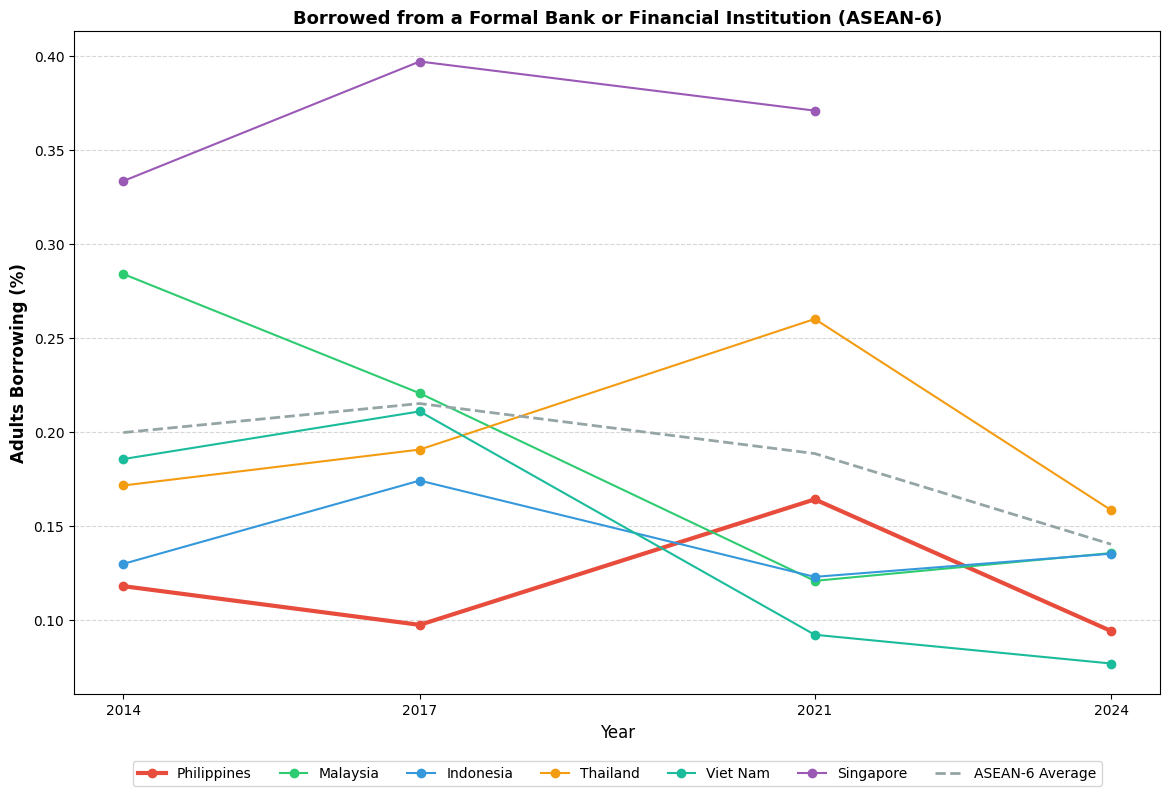

In [6]:
# Clean duplicates: average by country per year
df_plot_new = (
    df_plot.groupby(["countrynewwb", "year"], as_index=False)
    .mean()
)

# Plot
plt.figure(figsize=(12, 8))

# Plot lines for each country
for country in asean6:
    country_data = df_plot_new[df_plot_new["countrynewwb"] == country]

    # Get the color for the country from the dictionary
    color = country_colors.get(country)

    if country == "Philippines":
        plt.plot(
            country_data["year"], country_data["fin22a"],
            marker="o", linewidth=3, color= color, label="Philippines"
        )
    else:
        plt.plot(
            country_data["year"], country_data["fin22a"],
            marker="o", linewidth=1.5, color=color, label=country
        )
# Plot ASEAN-6 Average
plt.plot(
    asean6_avg["year"], asean6_avg["fin22a"],
    linestyle="--", color=asean_color, linewidth=2, label="ASEAN-6 Average"
)

# Formatting
plt.title("Borrowed from a Formal Bank or Financial Institution (ASEAN-6)",
          fontsize=13, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Adults Borrowing (%)", fontweight="bold", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(sorted(df_plot_new["year"].unique()))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

plt.tight_layout()
plt.show()

**OBSERVATIONS:**

The chart shows that borrowing from formal banks or financial institutions across ASEAN-6 countries has shifted in different ways over the past decade. In the Philippines, the share of adults borrowing from banks increased slightly from around 12% in 2014 to 16% in 2021, but then dropped again to about 10% in 2024 — falling below the ASEAN-6 average of around 20%. This suggests that while more Filipinos have gained access to banking services, fewer are actually using them for borrowing compared to their regional peers.
Across ASEAN, borrowing activity has remained relatively steady overall. Thailand stands out with its highest rate in 2021 (around 26%), showing stronger use of formal credit. Malaysia and Viet Nam both declined after 2017, possibly due to shifts toward informal or digital borrowing channels. Singapore remains the most active in formal borrowing, staying between 35–40%, though it also slightly decreased by 2024.

##Borrowed from a mobile money provider (%, age 15+).

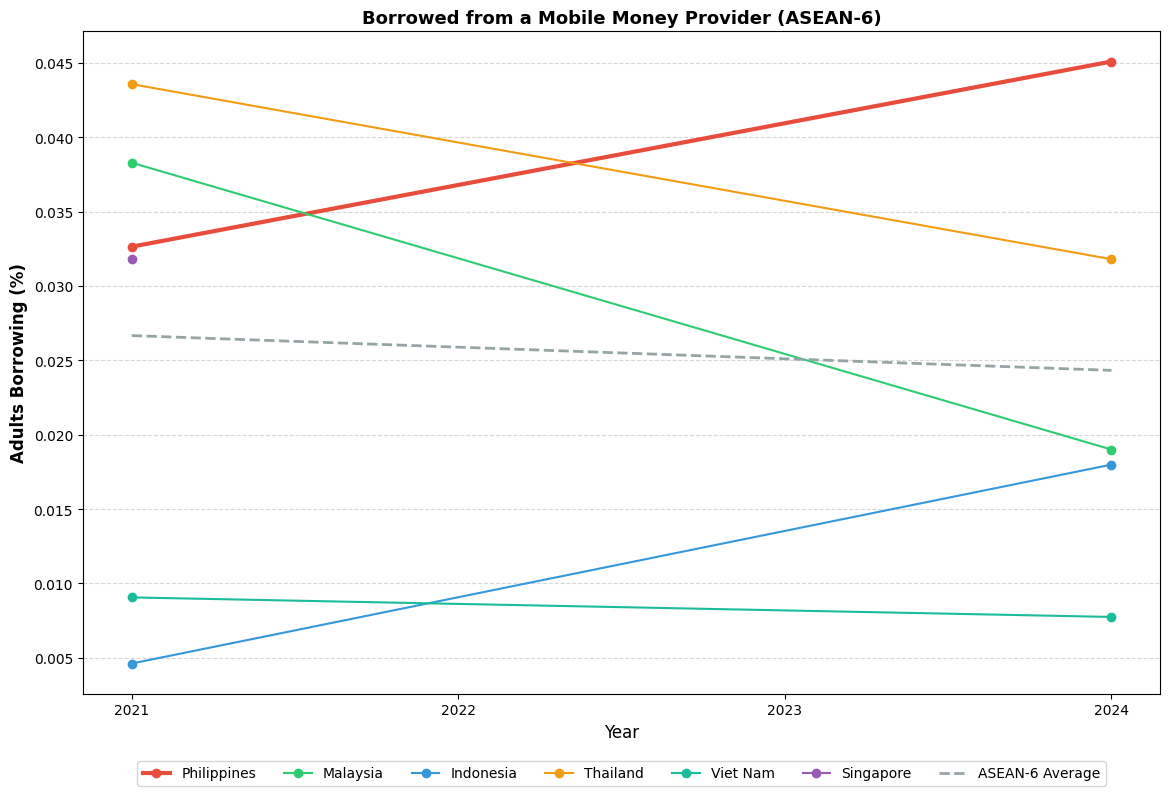

In [7]:
# Plot
plt.figure(figsize=(12, 8))

# Plot lines for each country
for country in asean6:
    country_data = df_plot_new[df_plot_new["countrynewwb"] == country]

    # Get the color for the country from the dictionary
    color = country_colors.get(country)

    if country == "Philippines":
        plt.plot(
            country_data["year"], country_data["fin22a_1"],
            marker="o", linewidth=3, color=color, label="Philippines"
        )
    else:
        plt.plot(
            country_data["year"], country_data["fin22a_1"],
            marker="o", linewidth=1.5, color=color, label=country
        )
# Plot ASEAN-6 Average
plt.plot(
    asean6_avg["year"], asean6_avg["fin22a_1"],
    linestyle="--", color=asean_color, linewidth=2, label="ASEAN-6 Average"
)

# Formatting
plt.title("Borrowed from a Mobile Money Provider (ASEAN-6)",
          fontsize=13, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Adults Borrowing (%)", fontweight="bold", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks([2021,2022,2023,2024])

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

plt.tight_layout()
plt.show()

As shown in the results, borrowing through mobile money in the Philippines grew steadily from around 3% in 2021 to about 4.5% in 2024, showing that more people are starting to use digital financial services for small loans. This trend placed the Philippines above the ASEAN-6 average, which stayed almost unchanged at around 2.5%.

In contrast, Malaysia and Thailand showed noticeable declines, which might suggest that users shifted back to traditional banks or other credit sources. Indonesia experienced a gradual increase, though levels remain modest at below 2%. Viet Nam stayed almost flat with a slight drop toward 2024.

##Borrowed from family or friends (%, age 15+).

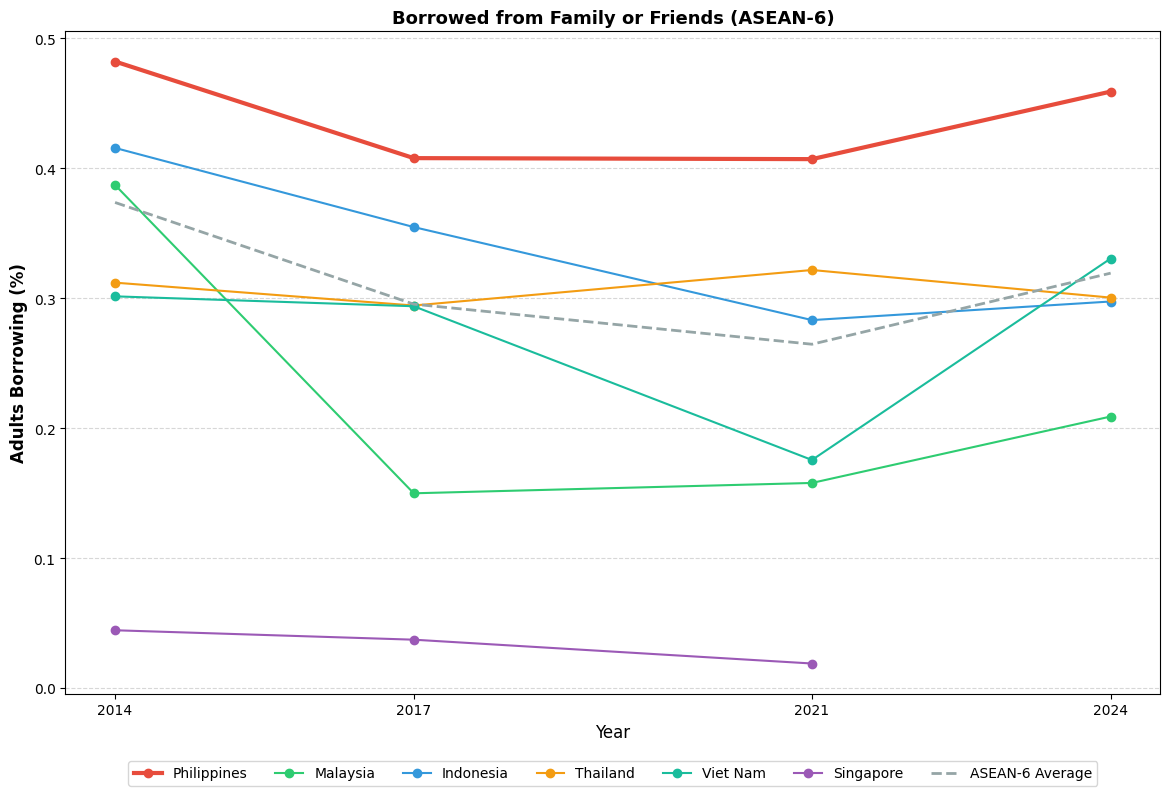

In [8]:
# Plot
plt.figure(figsize=(12, 8))

# Plot lines for each country
for country in asean6:
    country_data = df_plot_new[df_plot_new["countrynewwb"] == country]

    # Get the color for the country from the dictionary
    color = country_colors.get(country)

    if country == "Philippines":
        plt.plot(
            country_data["year"], country_data["fin22b"],
            marker="o", linewidth=3, color=color, label="Philippines"
        )
    else:
        plt.plot(
            country_data["year"], country_data["fin22b"],
            marker="o", linewidth=1.5, color=color, label=country
        )
# Plot ASEAN-6 Average
plt.plot(
    asean6_avg["year"], asean6_avg["fin22b"],
    linestyle="--", color=asean_color, linewidth=2, label="ASEAN-6 Average"
)

# Formatting
plt.title("Borrowed from Family or Friends (ASEAN-6)",
          fontsize=13, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Adults Borrowing (%)", fontweight="bold", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(sorted(df_plot_new["year"].unique()))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=7, fontsize=10)

plt.tight_layout()
plt.show()

**OBSERVATIONS**

The data reveals that borrowing from family and friends remains the dominant source of credit in the ASEAN-6. Although it dropped from about 37% in 2014 to 27% in 2021, it slightly rebounded to 32% by 2024. This highlights the persistent reliance on informal lending across the region.

In comparison, borrowing from formal financial institutions remained consistently lower and even declined over time—from a peak of around 21% in 2017 to just 14% in 2024. Meanwhile, borrowing from mobile money providers emerged after 2021 but has shown a slight decline since then, indicating that while digital borrowing grew in the post-pandemic period, it has yet to become a major borrowing channel in the region.

##ASEAN-6 Average: Borrowing Trends

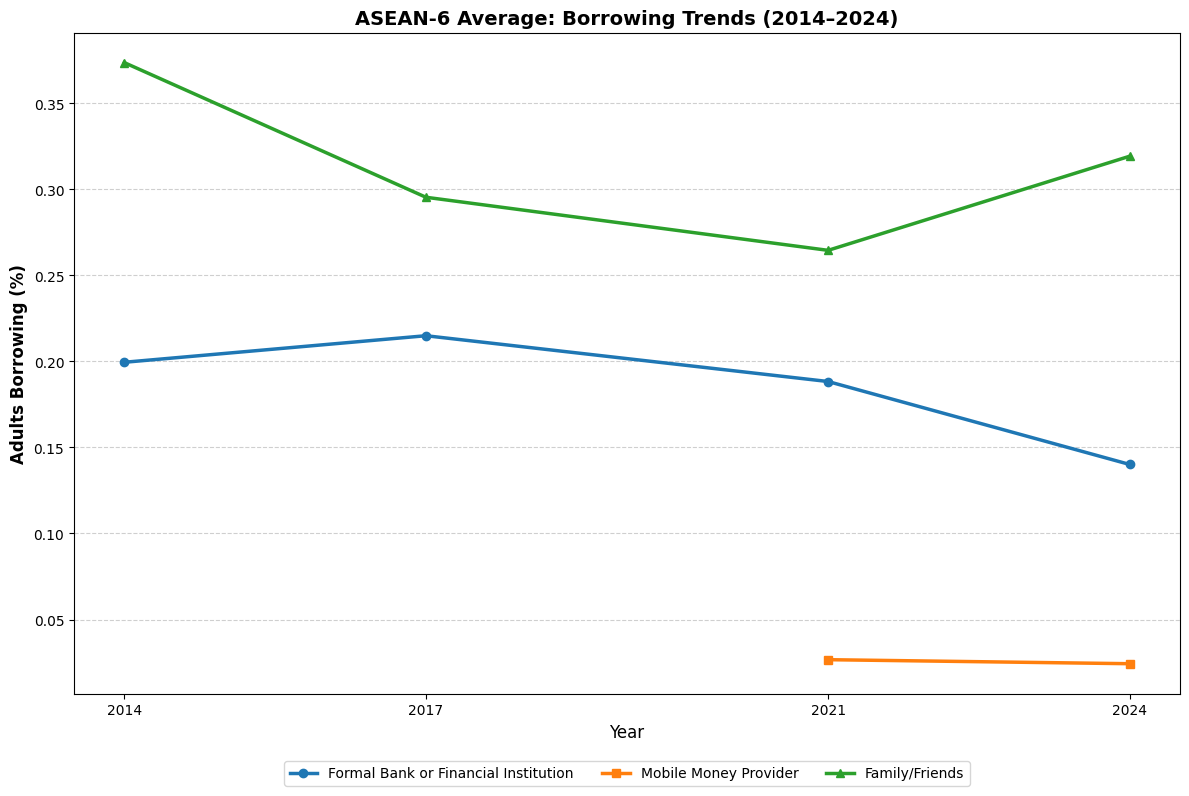

In [9]:
# Plot ASEAN-6 averages for each variable
plt.figure(figsize=(12, 8))

plt.plot(asean6_avg["year"], asean6_avg["fin22a"], marker="o", linewidth=2.5, label="Formal Bank or Financial Institution")
plt.plot(asean6_avg["year"], asean6_avg["fin22a_1"], marker="s", linewidth=2.5, label="Mobile Money Provider")
plt.plot(asean6_avg["year"], asean6_avg["fin22b"], marker="^", linewidth=2.5, label="Family/Friends")

# Formatting
plt.title("ASEAN-6 Average: Borrowing Trends (2014–2024)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Adults Borrowing (%)", fontsize=12, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(sorted(df_plot_new["year"].unique()))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncols=3, fontsize=10)

plt.tight_layout()
plt.show()


**OBSERVATIONS**

The data reveals that borrowing from family and friends remains the dominant source of credit in the ASEAN-6. Although it dropped from about 37% in 2014 to 27% in 2021, it slightly rebounded to 32% by 2024. This highlights the persistent reliance on informal lending across the region.

In comparison, borrowing from formal financial institutions remained consistently lower and even declined over time—from a peak of around 21% in 2017 to just 14% in 2024.
Meanwhile, borrowing from mobile money providers emerged after 2021 but has shown a slight decline since then, indicating that while digital borrowing grew in the post-pandemic period, it has yet to become a major borrowing channel in the region.

##SUMMARY

The ASEAN-6 paints a mixed picture of financial borrowing behavior over the past decade. Across the region, informal borrowing, **mainly from family and friends**, remains the most common source of credit, far exceeding formal bank and mobile money borrowing. This suggests that many still rely on personal networks for financial support, reflecting gaps in access, trust, or affordability within formal financial systems.

At the same time, digital borrowing through mobile money has emerged as a growing alternative, particularly in countries like the Philippines, where usage has increased to around 4.5%, surpassing the regional average. In contrast, borrowing from formal banks has remained stagnant or even declined in several economies. Taken together, these patterns reveal that while traditional banking continues to lag, digital finance is gradually shaping the future of borrowing and financial inclusion across ASEAN.